In [1]:
!git clone https://github.com/almaan/sepal.git

Cloning into 'sepal'...
remote: Enumerating objects: 583, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 583 (delta 44), reused 117 (delta 25), pack-reused 431
Receiving objects: 100% (583/583), 160.62 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (239/239), done.
Updating files: 100% (110/110), done.


In [2]:
%cd sepal
!chmod +x setup.py

/content/sepal


In [3]:
!./setup.py install

running install
running bdist_egg
running egg_info
creating sepal.egg-info
writing sepal.egg-info/PKG-INFO
writing dependency_links to sepal.egg-info/dependency_links.txt
writing entry points to sepal.egg-info/entry_points.txt
writing requirements to sepal.egg-info/requires.txt
writing top-level names to sepal.egg-info/top_level.txt
writing manifest file 'sepal.egg-info/SOURCES.txt'
reading manifest file 'sepal.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'sepal.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/sepal
copying sepal/analysis.py -> build/lib/sepal
copying sepal/utils.py -> build/lib/sepal
copying sepal/parser.py -> build/lib/sepal
copying sepal/__main__.py -> build/lib/sepal
copying sepal/datasets.py -> build/lib/sepal
copying sepal/models.py -> build/lib/sepal
copying sepal/enrich.py -> build/lib/sepal
copying sepal/__init__.p

In [4]:
!pip install -e ".[full]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/sepal
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lap: filename=lap-0.4.0-cp38-cp38-linux_x86_64.whl size=1679774 sha256=57a0d9b7b0c18fb073d1de305faa1a32e4e3526b12dd8d791526b3283c306aa6
  Stored in directory: /root/.cache/pip/wheels/86/ec/8a/2baa6fb3ea3a3bdc40a9c2c4b8957b5b544f207531f7a78a89
Successfully built lap
  Attempting uninstall: sepal
    Found existing installation: sepal 1.0.0
    Uninstalling sepal-1.0.0:
      Successfully uninstalled sepal-1.0.0
  Running setup.py develop for sepal


In [5]:
# Imports
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sepal
import sepal.datasets as d
import sepal.models as m
import sepal.utils as ut
import sepal.family as family
import sepal.enrich as fea


In [18]:
# Set path to melanoma sample
pth = "/content/sepal/data/real/melanoma.tsv.gz"
# load in the raw data using the RawData class
raw_data = d.RawData(pth,)
# filter genes observed in less than 5 spots
# and/or less than 10 total observations

raw_data.cnt = ut.filter_genes(raw_data.cnt,
                               min_expr=10,
                               min_occur=5)

# load into our our count data object
# this is a ST1K array, hence
# we use the ST1K class

data = m.ST1K(raw_data,
              eps = 0.1)

#if you want to print count or coordinate data
print(data.cnt)
#print(data.crd)



       ANXA2  DNAH1  PPP6C  CCL19  H3F3B  HNRNPA3  EIF4ENIF1  PDE6D  NUDC  \
2x9        0      0      1      0      4        3          0      0     0   
2x10       0      0      0      1      1        0          0      0     0   
2x11       0      0      0      2      0        2          0      0     3   
2x12       2      0      1      2      3        3          0      0     0   
2x13       1      0      0      1      0        1          0      0     0   
...      ...    ...    ...    ...    ...      ...        ...    ...   ...   
21x13      1      0      0      3      1        2          0      1     0   
21x14      2      0      0      0      0        0          0      0     0   
21x15      1      0      0      0      0        1          0      0     1   
21x16      1      0      0      0      3        4          0      0     3   
22x15      0      1      0      1      0        2          0      0     0   

       RALY  ...  VGF  DNAJC25  KCNN1  ST6GALNAC2  HOXB9  TEX41  SLC2A13  \

In [8]:
# We will normalize our count data
# and then propagate it in time, to measure
# the diffusion time.
# We set scale = True to perform
# minmax scaling of the diffusion times

# Running the simulation on 8 cores
# takes about ~2 minutes
#on colab it took 7 mins
times = m.propagate(data,
                    normalize = True,
                    scale =True)


[INFO] : Using 2 workers
[INFO] : Saturated Spots : 203


100%|██████████| 9956/9956 [06:59<00:00, 23.73it/s]


In [9]:
# Now, once the diffusion times
# have been computed for all the 
# profiles, we can inspect the
# top 20 highest ranked ones

n_top = 20
# get names of profiles
sorted_indices = np.argsort(times.values.flatten())
# argsort sorts from low to high, so reverse the order
sorted_indices = sorted_indices[::-1]
sorted_profiles = times.index.values[sorted_indices]
# extract top profiles
top_profiles = sorted_profiles[0:n_top]
# display top profiles and their times
times.loc[top_profiles,:]


average
RNASET2  1.000000
MLANA    0.836610
BCAN     0.765424
DOK5     0.739661
COL1A1   0.729492
MCAM     0.724068
MCOLN3   0.686102
RIPK4    0.684068
PMEL     0.671186
RGS5     0.596610
FCRL1    0.595932
FMN1     0.593898
COL3A1   0.578983
MZB1     0.541695
GPM6B    0.536949
IGFBP7   0.532881
VAV2     0.522712
CTSF     0.519322
CORO1A   0.517966
TTC8     0.512542

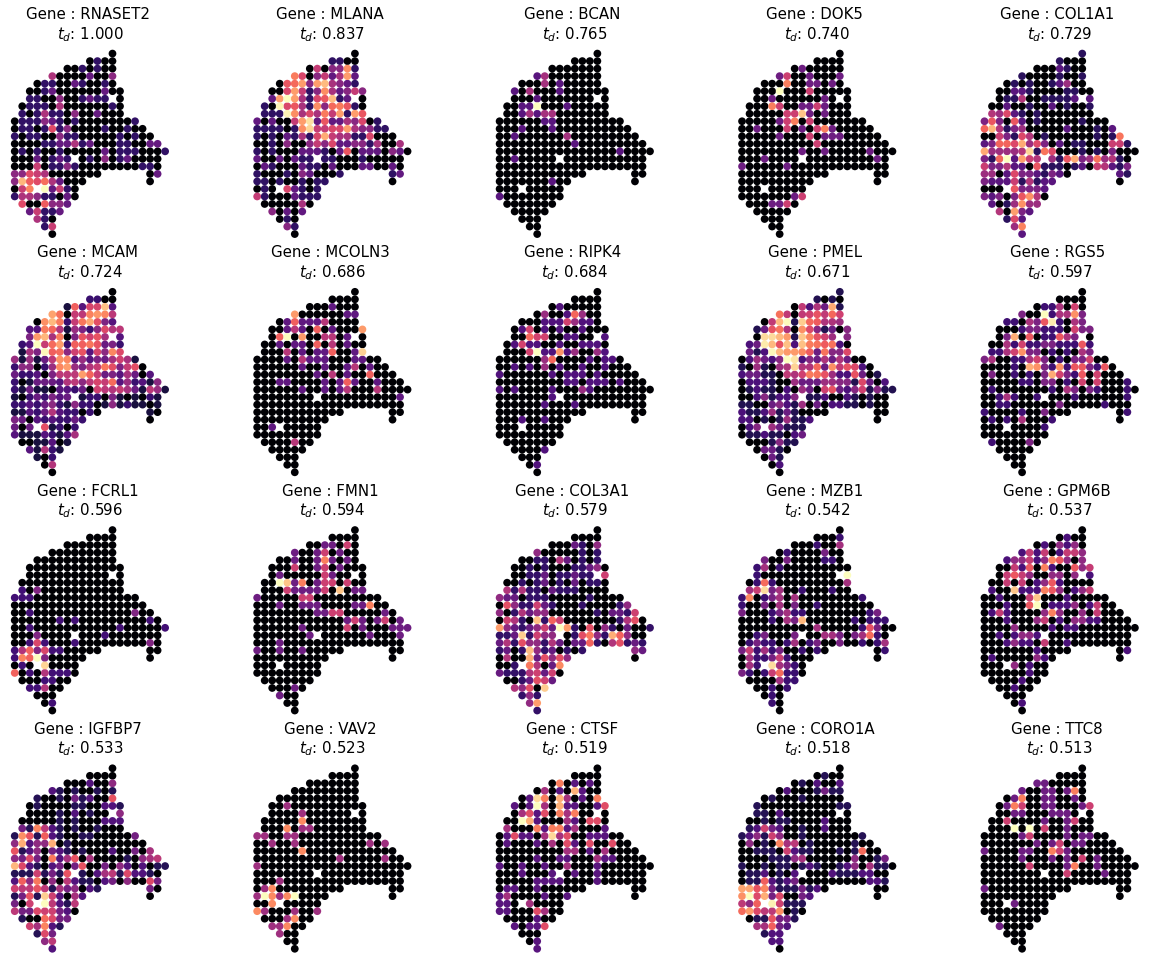

In [10]:
# Now, let us also inspect these visually
# for this we can use the "plot_profiles"
# function for this purpose


# specifications for our 
# plot. Same syntac
# as the scatter function
# in matplotlib

pltargs = dict(s = 60,
                cmap = "magma",
                edgecolor = 'none',
                marker = 'o',
                )

# plot the profiles
fig,ax = ut.plot_profiles(cnt = data.cnt.loc[:,top_profiles],
                          crd = data.real_crd,
                          rank_values = times.loc[top_profiles,:].values.flatten(),
                          pltargs = pltargs,
                         )
plt.show()


In [19]:
# Let us, as a subsequent step, sort
# these profiles into pattern families

# we will use the top 100 profiles
# to build our families
n_build = 150

# use the "get_families" function
# to group the profiles
family_labels,repr_patterns = family.get_families(data.cnt.loc[:,sorted_profiles].values,
                                            n_base = n_build,
                                            n_sort = n_build,
                                            threshold = 0.80,
                                            )
# familiy label is am array of family indices
# for each of the profiles. We convert
# this to a data frame to make it easier to work with
families = pd.DataFrame(family_labels,
                        index = sorted_profiles[0:n_build],
                        columns = ['family'],
                        )


[INFO] : Using 4 eigenpatterns
[INFO] : Identified 4 families


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


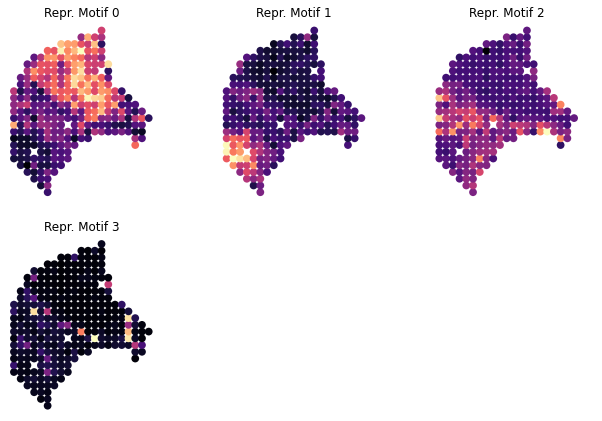

In [20]:
# As displayed, 4 families were found. To get
# an idea of what type what type of spatial
# patterns that each family consists of
# we will plot their respective representative motifs

# use the "plot_representative" function
# for this purpose
fig, ax = family.plot_representative(motifs=repr_patterns,
                                 crd = data.real_crd,
                                 ncols = 3,
                                 pltargs=pltargs)


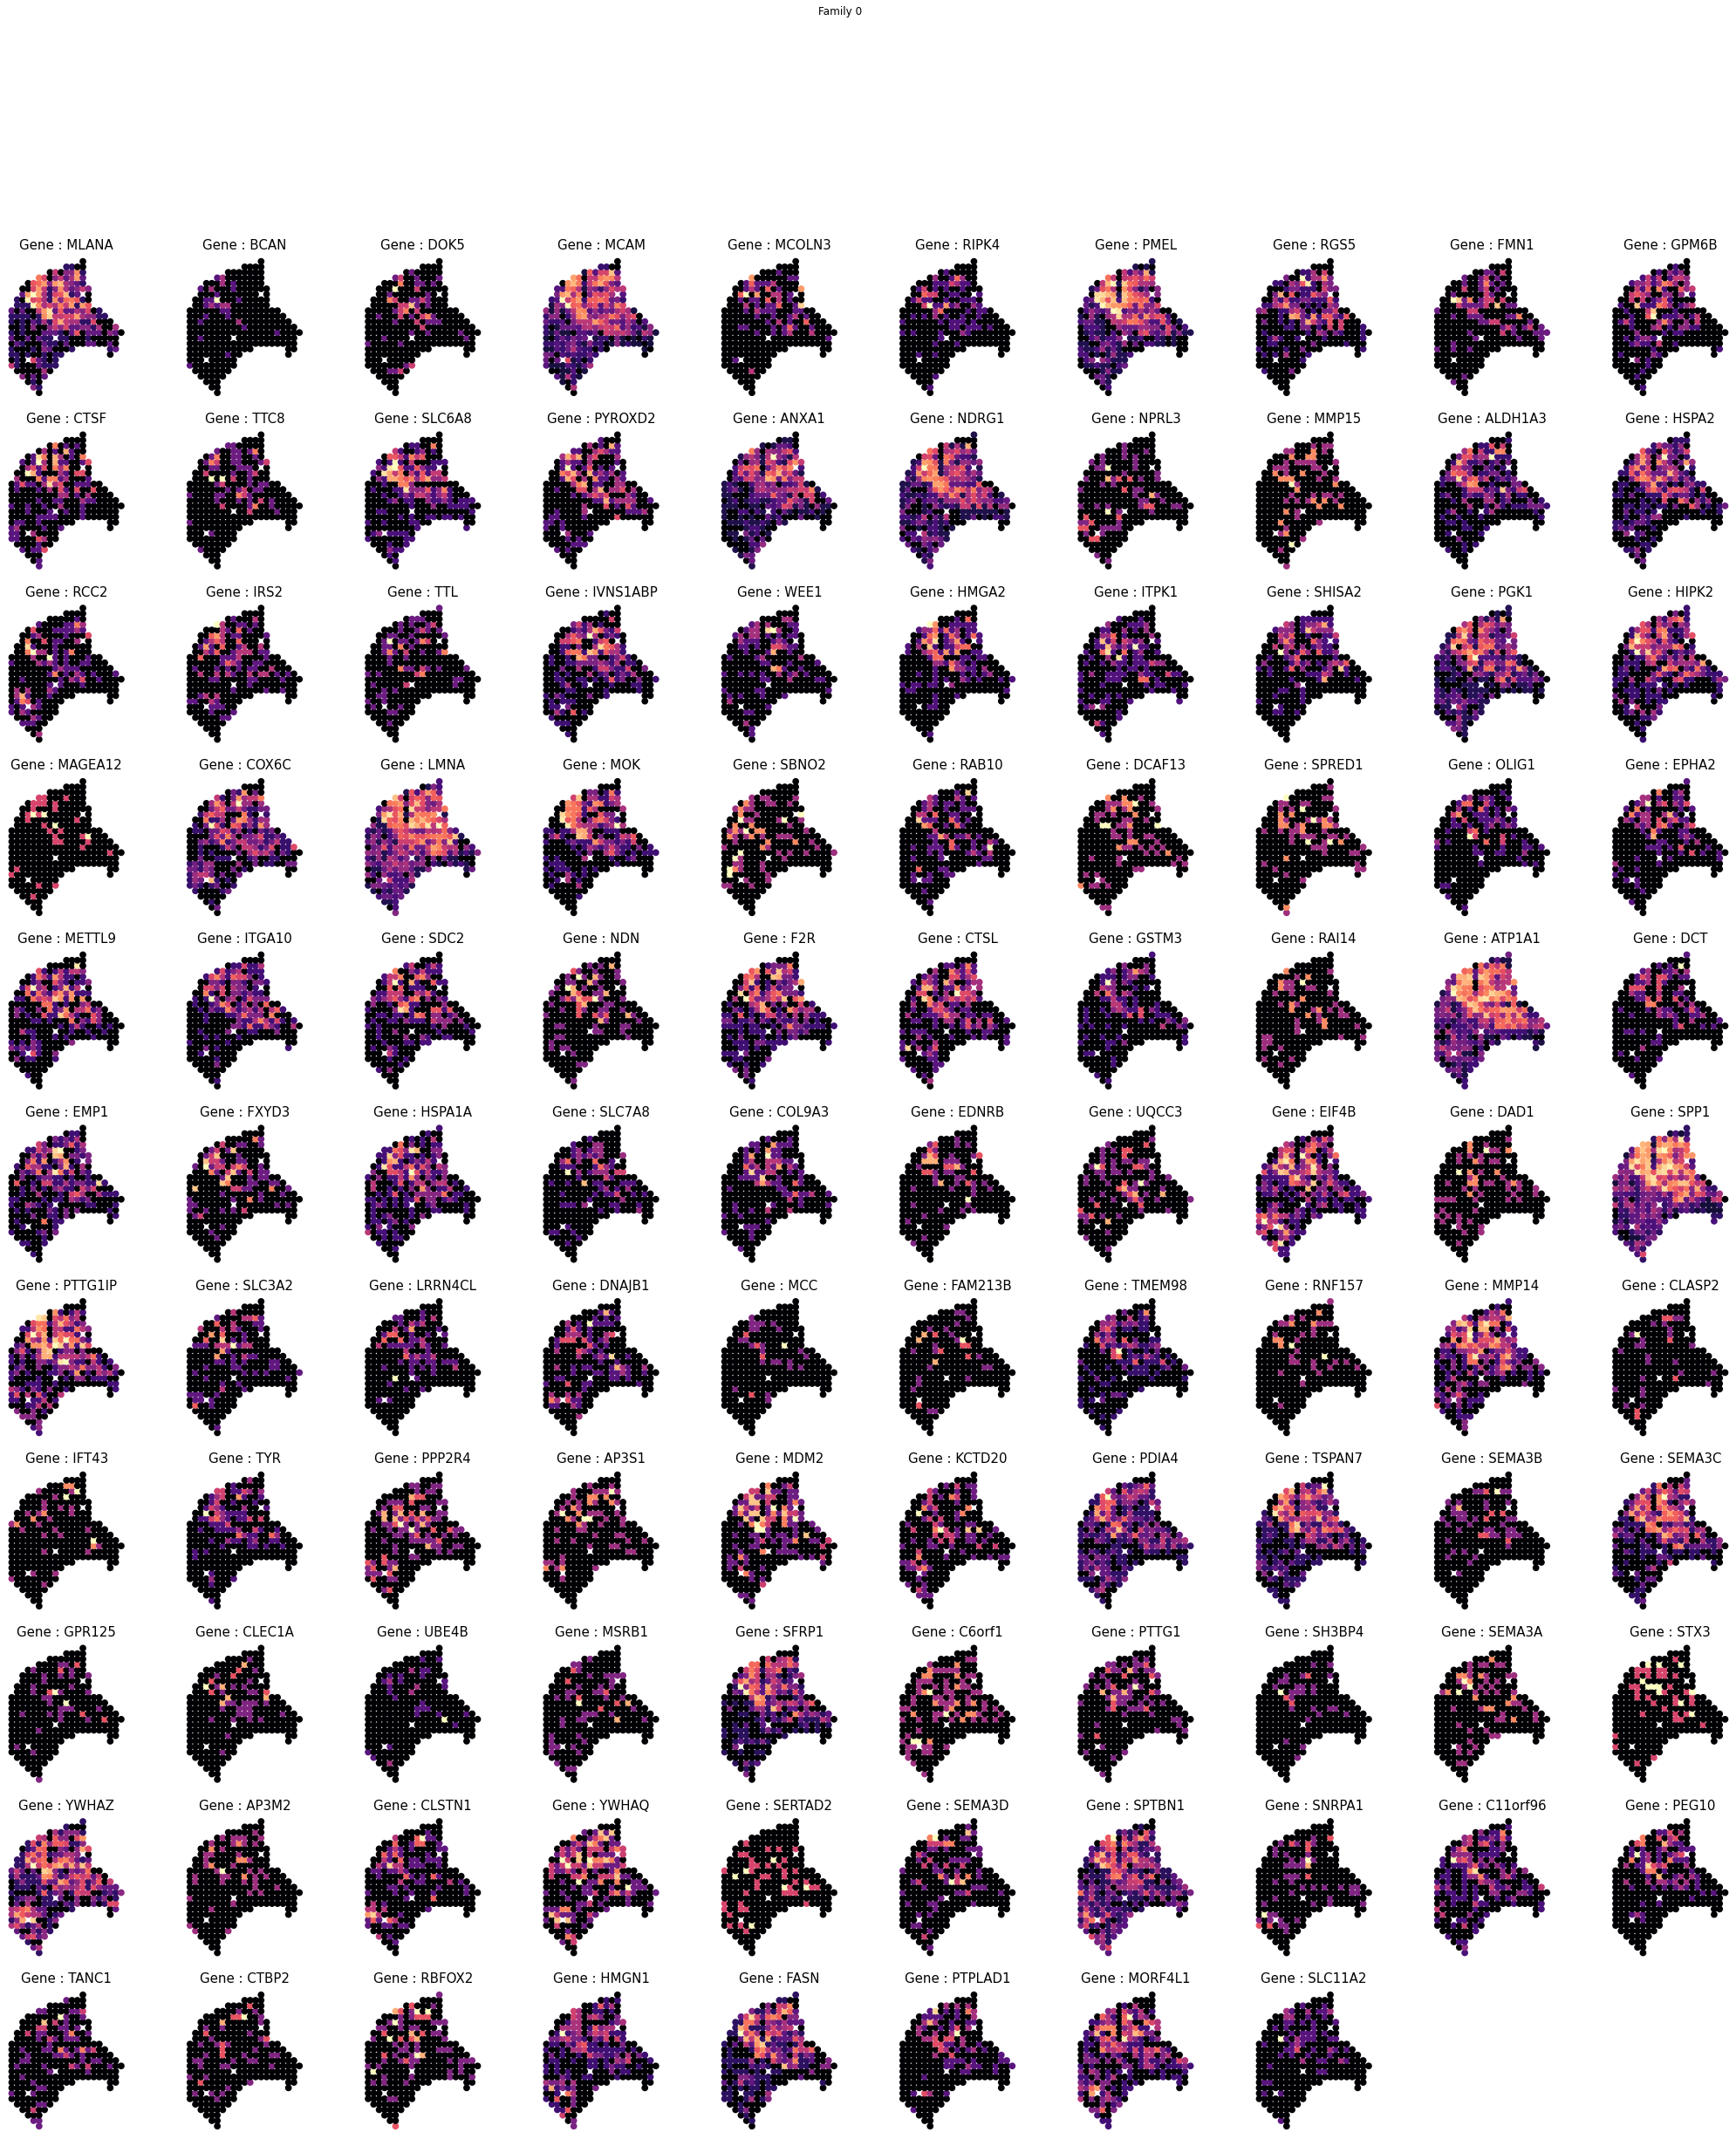

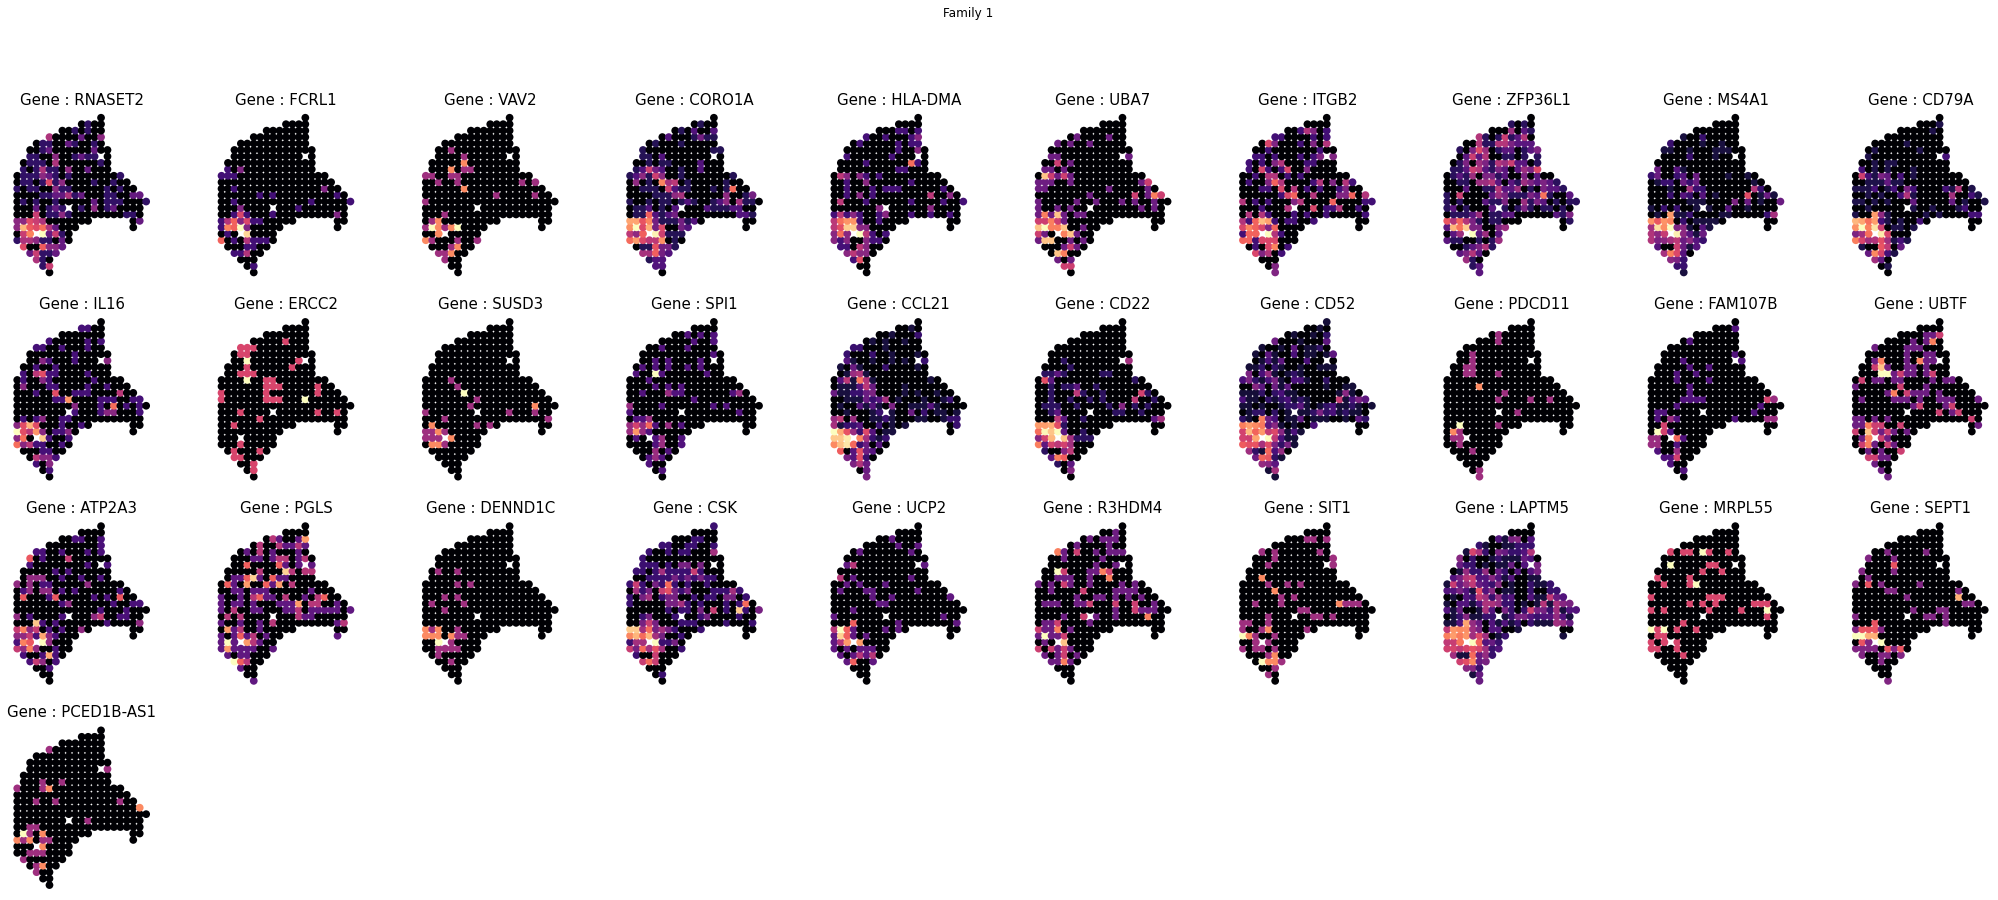

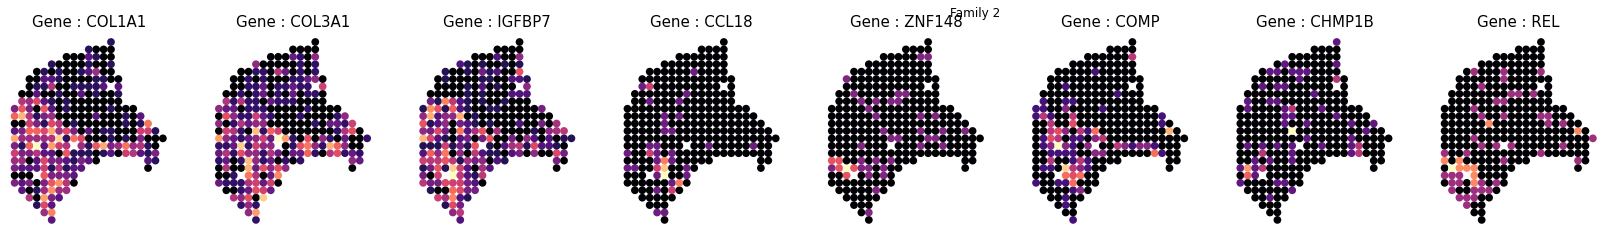

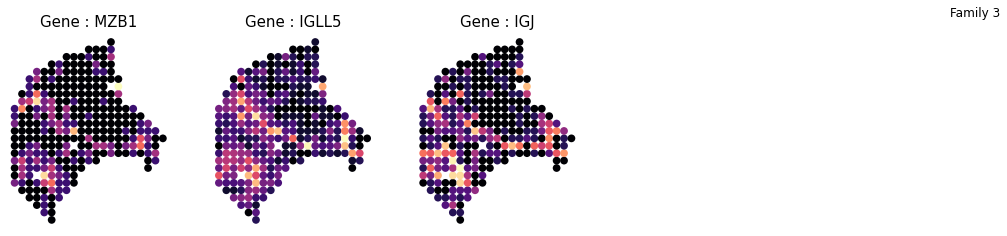

In [21]:
# having done so, we se that the motifs differ to some extent
# and we may inspect all the members of each
# family

# use the "plot_family" function for this
family_plots= family.plot_families(data.cnt.loc[:,sorted_profiles[0:n_build]].values,
                           genes = sorted_profiles[0:n_build],
                           crd = data.real_crd,
                           labels = family_labels,
                           ncols = 10,
                           pltargs = pltargs,
                           side_size = 300,
                           )


In [22]:
# Finally, to see what drives the spatial
# patterns associated to each motif
# we can subject the
# families to an enrichment analysis

# to analyze a the families we have found
# simply use the output of data frame
# generated from the "get_families" output
# as input to "analyze_families"

# we will query against GO:BP
# and use human as organism
# we use g:Profiler as a backend in our
# enrichment analysis


fea_res = fea.analyze_families(families,
                       organism = "hsapiens",
                       dbs = ["GO:BP"],
                       )


In [23]:
# The identified processes, with a significant
# enrichment are
fea_res


family      native                                name       p_value  \
1         0  GO:0032502               developmental process  1.432192e-09   
2         0  GO:0007399          nervous system development  1.625930e-08   
3         0  GO:0048731                  system development  1.669159e-08   
4         0  GO:0048856    anatomical structure development  2.227503e-08   
5         0  GO:0007275  multicellular organism development  8.365148e-08   
..      ...         ...                                 ...           ...   
114       2  GO:0006950                  response to stress  1.791567e-03   
115       2  GO:0060349                  bone morphogenesis  6.830786e-03   
116       2  GO:0042060                       wound healing  1.381284e-02   
117       2  GO:0009611                response to wounding  3.931368e-02   
118       3  GO:0050864     regulation of B cell activation  4.835012e-02   

    source  intersection_size  
1    GO:BP                 64  
2    GO:BP                 38  
3    GO:BP                 48  
4    GO:BP                 59  
5    GO:BP                 51  
..     ...                ...  
114  GO:BP                  8  
115  GO:BP                  3  
116  GO:BP                  4  
117  GO:BP                  4  
118  GO:BP                  2  

[118 rows x 6 columns]